In [48]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [49]:
%pip install numpy as np

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
%pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [52]:
import cv2
import os
import numpy as np

In [53]:
project_path=r"C:\Users\Asus\Desktop\NeuroDoku"
sudoku_images_digits=os.path.join(project_path,r"digits_updated\digits_updated")


In [54]:
sudoku_images_digits

'C:\\Users\\Asus\\Desktop\\NeuroDoku\\digits_updated\\digits_updated'

In [55]:
data_list=os.listdir(sudoku_images_digits)
print(data_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [56]:
data_list

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [57]:
data_X=[]
data_Y=[]

In [58]:
print(type(data_list))
print(os.listdir(os.path.join(sudoku_images_digits,r"0")))

<class 'list'>
['img001-00001.png', 'img001-00002.png', 'img001-00003.png', 'img001-00004.png', 'img001-00005.png', 'img001-00006.png', 'img001-00007.png', 'img001-00008.png', 'img001-00009.png', 'img001-00010.png', 'img001-00011.png', 'img001-00012.png', 'img001-00013.png', 'img001-00014.png', 'img001-00015.png', 'img001-00016.png', 'img001-00017.png', 'img001-00018.png', 'img001-00019.png', 'img001-00020.png', 'img001-00021.png', 'img001-00022.png', 'img001-00023.png', 'img001-00024.png', 'img001-00025.png', 'img001-00026.png', 'img001-00027.png', 'img001-00028.png', 'img001-00029.png', 'img001-00030.png', 'img001-00031.png', 'img001-00032.png', 'img001-00033.png', 'img001-00034.png', 'img001-00035.png', 'img001-00036.png', 'img001-00037.png', 'img001-00038.png', 'img001-00039.png', 'img001-00040.png', 'img001-00041.png', 'img001-00042.png', 'img001-00043.png', 'img001-00044.png', 'img001-00045.png', 'img001-00046.png', 'img001-00047.png', 'img001-00048.png', 'img001-00049.png', 'img

In [59]:
for image_name in data_list:
    for digit_name in os.listdir(os.path.join(sudoku_images_digits,f'{image_name}')):
        image_path_folder=os.path.join(sudoku_images_digits,f"{image_name}")
        image_path=os.path.join(image_path_folder,digit_name)
        pic=cv2.imread(image_path)
        pic=cv2.resize(pic,(32,32))
        data_X.append(pic)
        label=int(image_name)
        data_Y.append(label)


In [60]:
len(data_Y)

10160

In [61]:
if len(data_X)==len(data_Y):
    print("Toatl Data Points :", len(data_Y))

Toatl Data Points : 10160


In [62]:
data_X


[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [63]:
data_X=np.array(data_X)
data_Y=np.array(data_Y)

In [64]:
from tensorflow.keras.utils import to_categorical

In [65]:
# train_y_categorical=to_categorical(data_Y,np.max(data_Y)+1)

In [66]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [67]:
import sklearn

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
train_X, test_X, train_y, test_y = train_test_split(data_X,data_Y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [71]:
def Prep(img):
    if len(img.shape) > 2 and img.shape[2] > 1:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert to grayscale
    img = img.astype(np.uint8) # convert to 8-bit unsigned integer
    img = cv2.equalizeHist(img) # histogram equalization
    img = img/255 # normalizing
    return img

train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [72]:
data_classes = np.max(data_Y) + 1
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D


In [74]:
model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\Asus\anaconda3\envs\sudoku_solver\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       960,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081,490 (4.13 MB)

 Trainable params: 1,081,490 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
from tensorflow.keras.optimizers import RMSprop

In [76]:
train_y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [77]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

train_y_int = np.argmax(train_y, axis=1)
valid_y_int = np.argmax(valid_y, axis=1)

history = model.fit(train_X, train_y_int, 
                    epochs=30, 
                    validation_data=(valid_X, valid_y_int), 
                    verbose=2, 
                    batch_size=32)

Epoch 1/30


c:\Users\Asus\anaconda3\envs\sudoku_solver\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


242/242 - 13s - 55ms/step - accuracy: 0.8306 - loss: 0.5111 - val_accuracy: 0.9814 - val_loss: 0.0678
Epoch 2/30
242/242 - 11s - 47ms/step - accuracy: 0.9666 - loss: 0.1077 - val_accuracy: 0.9865 - val_loss: 0.0438
Epoch 3/30
242/242 - 12s - 50ms/step - accuracy: 0.9782 - loss: 0.0691 - val_accuracy: 0.9814 - val_loss: 0.0576
Epoch 4/30
242/242 - 20s - 84ms/step - accuracy: 0.9829 - loss: 0.0565 - val_accuracy: 0.9896 - val_loss: 0.0269
Epoch 5/30
242/242 - 12s - 51ms/step - accuracy: 0.9870 - loss: 0.0468 - val_accuracy: 0.9896 - val_loss: 0.0308
Epoch 6/30
242/242 - 13s - 52ms/step - accuracy: 0.9890 - loss: 0.0329 - val_accuracy: 0.9938 - val_loss: 0.0221
Epoch 7/30
242/242 - 12s - 51ms/step - accuracy: 0.9896 - loss: 0.0334 - val_accuracy: 0.9943 - val_loss: 0.0211
Epoch 8/30
242/242 - 13s - 52ms/step - accuracy: 0.9905 - loss: 0.0314 - val_accuracy: 0.9964 - val_loss: 0.0166
Epoch 9/30
242/242 - 24s - 98ms/step - accuracy: 0.9925 - loss: 0.0278 - val_accuracy: 0.9953 - val_loss: 0

In [78]:
#user will provide a sudoku to solve->find the ccontours and the nos and then solve the sudoku 

In [79]:
import random

In [80]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [92]:
model.save("model.keras")

In [81]:
import matplotlib.pyplot as plt
import seaborn as sb

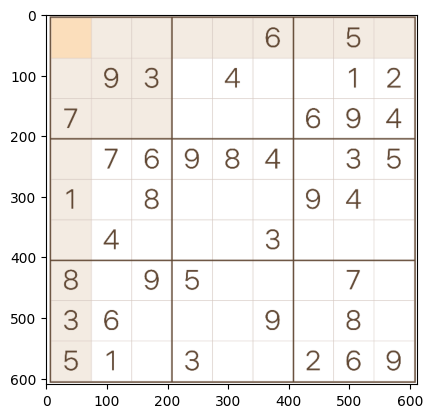

In [110]:
sukou_pics_folder=r"C:\Users\Asus\Desktop\NeuroDoku\sudoku_images\dataset"
suoku_to_solve_name="img.png"
sudoku_to_solve=cv2.imread(os.path.join(sukou_pics_folder,suoku_to_solve_name))
plt.imshow(sudoku_to_solve)
plt.show() 


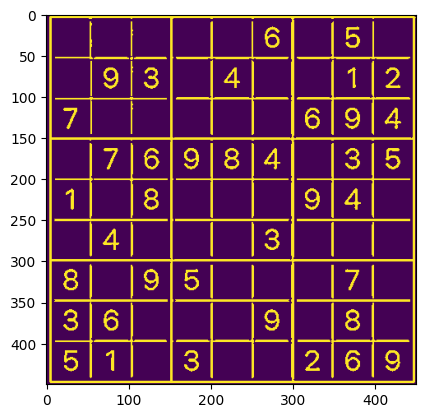

In [111]:
sudoku_to_solve = cv2.resize(sudoku_to_solve, (450,450))

# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_to_solve)


plt.figure()
plt.imshow(threshold)
plt.show()

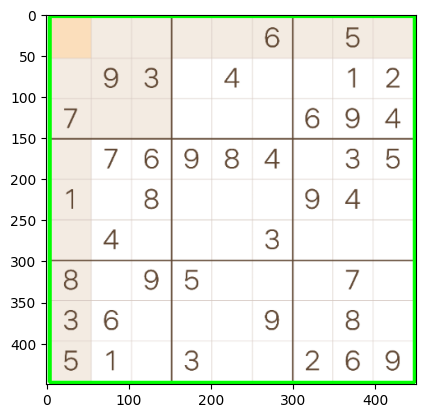

In [112]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku_to_solve.copy()
contour_2 = sudoku_to_solve.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)


plt.figure()
plt.imshow(contour_1)
plt.show()

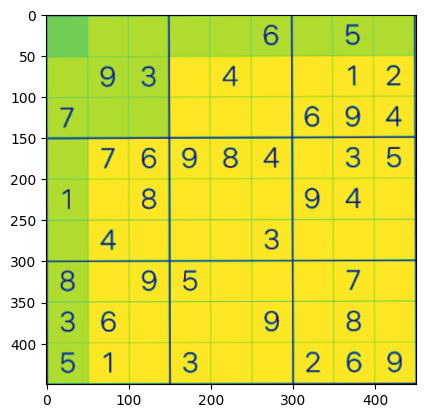

In [113]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv2.warpPerspective(sudoku_to_solve,matrix,(450,450))
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap)
plt.show()

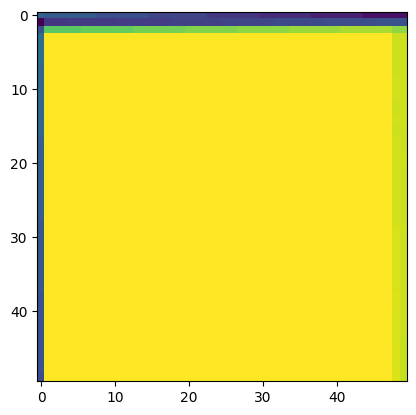

In [114]:
sudoku_cell = splitcells(imagewrap)

plt.figure()
plt.imshow(sudoku_cell[3])
plt.show()

In [115]:
%pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [116]:
from PIL import Image

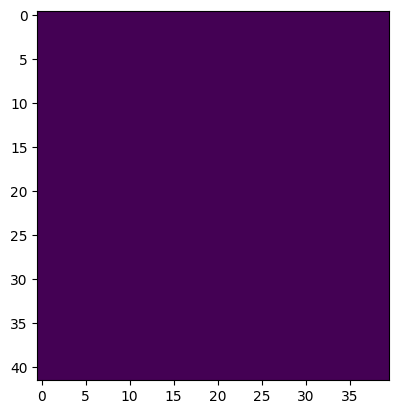

In [117]:
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)
plt.figure()
plt.imshow(sudoku_cell_croped[3])
plt.show()

In [118]:
def read_cells(cell,model):

    result = []
    for image in cell:
        # preprocess the image as it was in the model 
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        # getting predictions and setting the values if probabilities are above 65% 
        
        predictions = model.predict(img)
        #classIndex = model.predict_classes(img)
        classIndex = np.argmax(predictions, axis=1)[0]
        probabilityValue = np.amax(predictions,axis=1)
        
        if probabilityValue > 0.60:
            result.append(int(classIndex))
        else:
            result.append(0)
    return result

grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [119]:

grid = np.reshape(grid,(9,9))
grid

array([[0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 9, 3, 0, 4, 0, 0, 1, 2],
       [7, 0, 0, 0, 0, 0, 5, 9, 4],
       [0, 7, 6, 9, 8, 4, 0, 3, 5],
       [1, 0, 8, 0, 0, 0, 9, 4, 0],
       [0, 4, 0, 0, 0, 3, 0, 0, 0],
       [8, 0, 9, 5, 0, 0, 0, 7, 0],
       [3, 6, 0, 0, 0, 9, 0, 8, 0],
       [5, 1, 0, 3, 0, 0, 2, 6, 9]])

In [120]:
#backtrack algorithm to solve sudoku

In [121]:
solve(grid)

NameError: name 'solve' is not defined